In [1]:
#importar as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

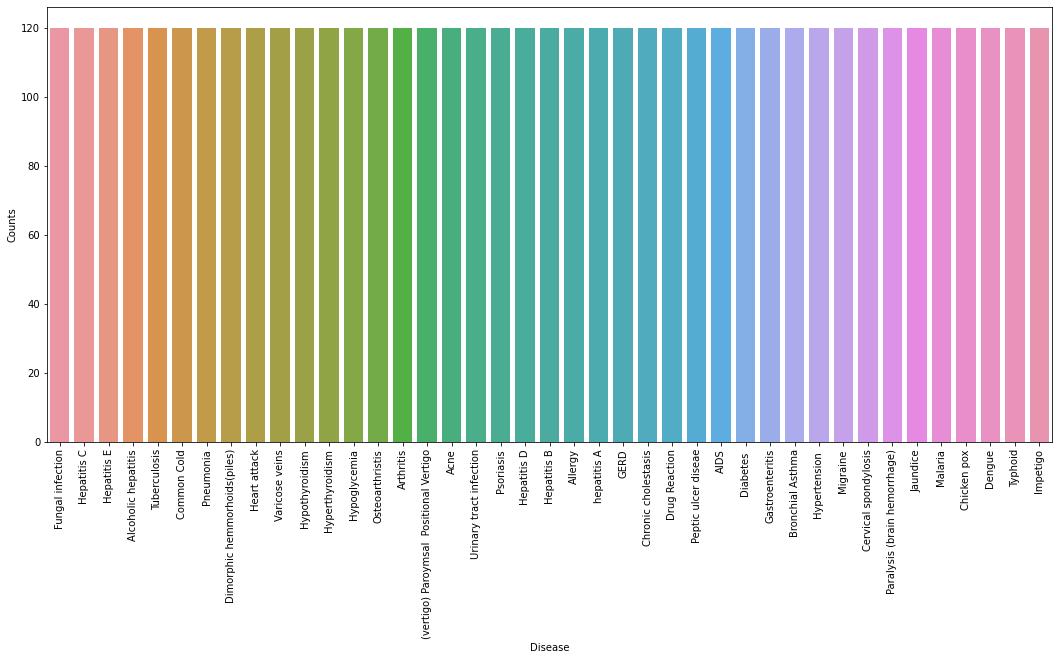

In [2]:
data = pd.read_csv("./datasets/training.csv").dropna(axis = 1)

disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [3]:
#codificação da categoria doença
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


In [4]:
#dividindo os dados em treino e teste
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
 
print(f"Treino: {X_train.shape}, {y_train.shape}")
print(f"Teste: {X_test.shape}, {y_test.shape}")

Treino: (3936, 132), (3936,)
Teste: (984, 132), (984,)


In [5]:
# método de avaliação dos modelos com k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Inicializando os modelos
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                            n_jobs = -1,
                            scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Score médio: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Score médio: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Score médio: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Score médio: 1.0


Combinando os três modelos para criar um modelo maior

Acurácia no treino com SVM Classifier: 100.0
Acurácia no teste com SVM Classifier: 100.0


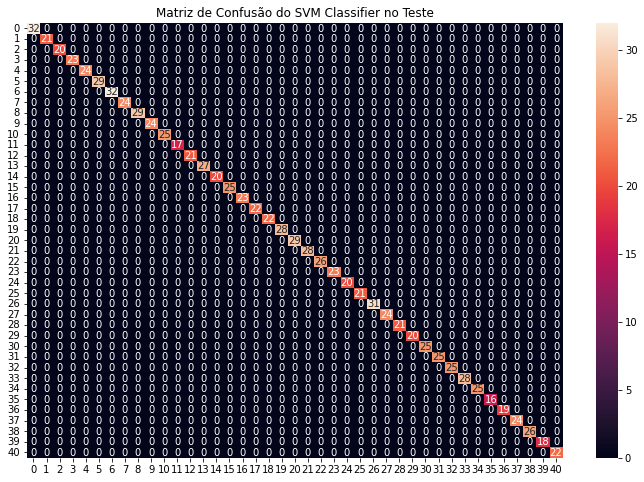

Acurácia no treino com Naive Bayes Classifier: 100.0
Acurácia no teste com Naive Bayes Classifier: 100.0


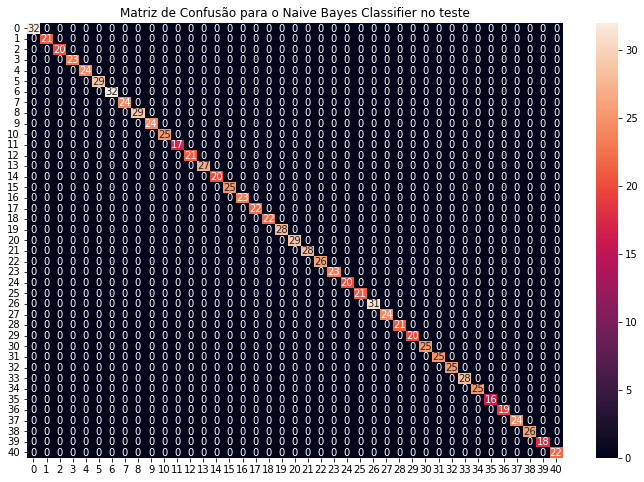

Acurácia no treino com Random Forest Classifier: 100.0
Acurácia no teste com Random Forest Classifier: 100.0


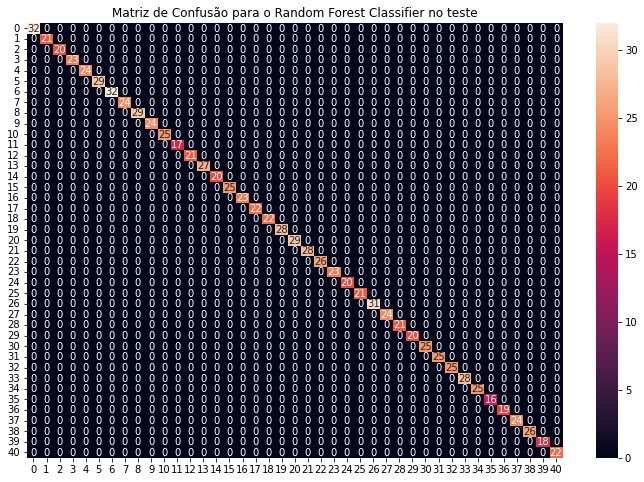

In [6]:
# Treinando e Testando o SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Acurácia no treino com SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Acurácia no teste com SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Matriz de Confusão do SVM Classifier no Teste")
plt.show()

# Treinando e Testando o Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Acurácia no treino com Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Acurácia no teste com Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Matriz de Confusão para o Naive Bayes Classifier no teste")
plt.show()

# Treinando e Testando o Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Acurácia no treino com Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Acurácia no teste com Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Matriz de Confusão para o Random Forest Classifier no teste")
plt.show()


Acurácia no teste combinando todos os modelos: 100.0


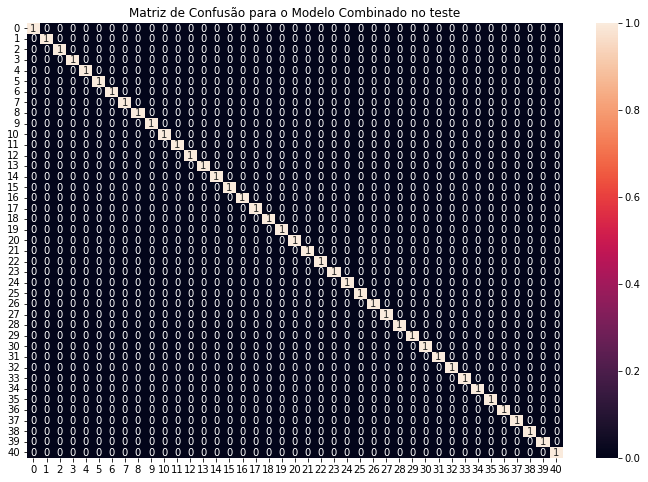

In [7]:
# Treinando os modelos com todos os dados
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Dados de teste
test_data = pd.read_csv("./datasets/testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])


# Fazendo predição pegando predições feitas por todos os modelos
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0][0] for i,j,
            k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Acurácia no teste combinando todos os modelos\
: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Matriz de Confusão para o Modelo Combinado no teste")
plt.show()


In [8]:
symptoms = X.columns.values

# Criando um dicionário de sintomas para codificar os sintomas de entrada em dado numérico
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Definindo a função
# Input: string contendo os sintomas separados por vírgulas
# Output: predição gerada pelos modelos
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # criando dados de input para os modelos
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping os daods de input e convertendo para ficar adequado para as predições dos modelos
    input_data = np.array(input_data).reshape(1,-1)

    # gerando outputs individuais
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # fazendo uma previsão final pela moda de todas as previsões
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "Previsão do Modelo 'Random Forest'": rf_prediction,
        "Previsão do Modelo 'Naive Bayes'": nb_prediction,
        "Previsão do Modelo 'SVM'": nb_prediction,
        "Previsão Final:":final_prediction
    }
    return predictions

# Testando a função
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions,Dischromic  Patches"))

predict = predictDisease

{"Previsão do Modelo 'Random Forest'": 'Fungal infection', "Previsão do Modelo 'Naive Bayes'": 'Fungal infection', "Previsão do Modelo 'SVM'": 'Fungal infection', 'Previsão Final:': 'Fungal infection'}


In [9]:
pd.to_pickle(predict, r'./model.pickle')

In [10]:
model = pd.read_pickle(r'./model.pickle')

In [11]:
result = model("Itching,Skin Rash,Nodal Skin Eruptions,Dischromic  Patches")

In [12]:
print(result)

{"Previsão do Modelo 'Random Forest'": 'Fungal infection', "Previsão do Modelo 'Naive Bayes'": 'Fungal infection', "Previsão do Modelo 'SVM'": 'Fungal infection', 'Previsão Final:': 'Fungal infection'}
